# 元データの生成

$p(y|x)p(x)$の$p(x)$の部分

In [1]:
import autopep8
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline

In [2]:
def gen_y(x):
    return -x + x**3 + np.random.normal(loc=0, scale=0.3, size=len(x))

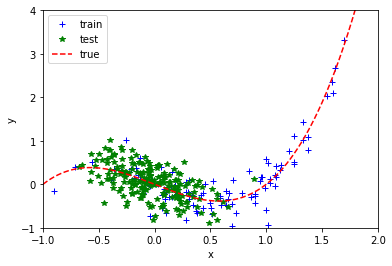

In [27]:
# Shimodaira et al. の設定
np.random.seed(123)
train_x = np.random.normal(loc=0.5, scale=0.5, size=100)
train_y = gen_y(train_x)
test_x = np.random.normal(loc=0, scale=0.3, size=200)
test_y = gen_y(test_x)

gri = np.linspace(-1, 2, 1000)
plt.plot(train_x, train_y, '+b', label='train')
plt.plot(test_x, test_y, '*g', label='test')
plt.plot(gri, -gri + gri**3, 'r--', label='true')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 2)
plt.ylim(-1, 4)
plt.legend()

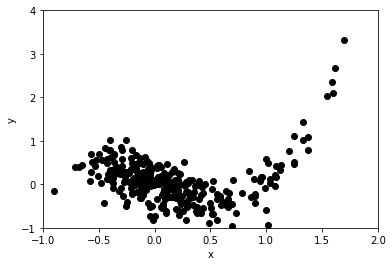

In [4]:
plt.plot(train_x, train_y, 'ko', label='train')
plt.plot(test_x, test_y, 'ko', label='test')
#plt.plot(gri, -gri + gri**3, 'y--', label='true')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 2)
plt.ylim(-1, 4)
#plt.legend()
plt.savefig('sample.pdf')

In [26]:
plt.plot?

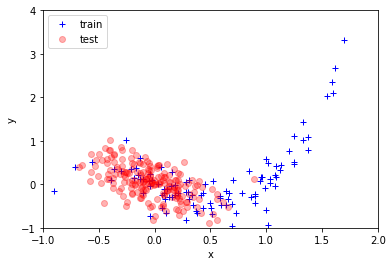

In [5]:
plt.plot(train_x, train_y, '+b', label='train')
plt.plot(test_x, test_y, 'or', label='test', alpha = 0.3)
#plt.plot(gri, -gri + gri**3, 'y--', label='true')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 2)
plt.ylim(-1, 4)
plt.legend()
plt.savefig('sample_CS.pdf')

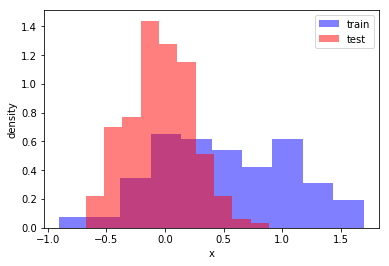

In [6]:
# データの密度
plt.hist(train_x, alpha=0.5, label='train', color = 'b', density=True)
plt.hist(test_x, alpha=0.5, label='test', color = 'r', density = True)
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.savefig('sample_CS_hist.pdf')

# データ点間の距離計算

In [20]:
from scipy.spatial import distance

In [21]:
np.random.seed(123)
x = np.random.multivariate_normal(mean = [0,0], cov = [[1,0],[0,1]], size = 100)
y = np.random.multivariate_normal(mean = [1.5,1.5], cov = [[1,0],[0,1]], size = 100)

# CE最小化のためのデータ点重み付け
***注意事項***

エントロピー算出の際は, データ点間の距離に対してlogをとるので、1以下と1以上で挙動が変化するので注意が必要

→（1以上の距離になるように設定(距離尺度を変更)するか、　最大1の類似度になるように設計する必要がある）

In [29]:
def cal_MCEW(train, test):
    # train, test ndarray object number of data(row) × n-dim(column)
    grad = np.log(distance.cdist(train,test)).sum(axis = 1)
    grad = grad/grad.sum()
    weight = 1 - 1 / grad.max() * grad
    return(weight / weight.sum())

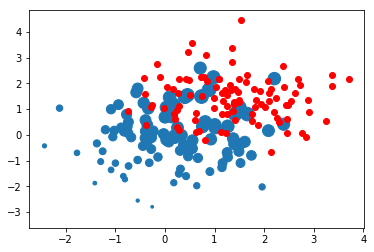

In [30]:
cal_MCEW(x, y)
plt.scatter(x[:,0], x[:,1],  s = cal_MCEW(x,y)*10000)
plt.plot(y[:,0], y[:,1], 'ro')

## WLSによる回帰直線

In [8]:
import statsmodels.api as sm

In [39]:
distance.cdist(train_x[:,1][:, np.newaxis], test_x[:, np.newaxis])

array([[0.25380834, 0.1366163 , 0.70302593, ..., 0.11642912, 0.00771263,
        0.11602338],
       [0.78767969, 1.17810432, 0.33846209, ..., 0.9250589 , 1.04920065,
        0.92546464],
       [0.43049621, 0.82092085, 0.01872138, ..., 0.56787543, 0.69201718,
        0.56828117],
       ...,
       [0.39272881, 0.00230417, 0.8419464 , ..., 0.25534959, 0.13120784,
        0.25494385],
       [0.47870727, 0.86913191, 0.02948968, ..., 0.61608648, 0.74022824,
        0.61649222],
       [0.09941875, 0.48984338, 0.34979885, ..., 0.23679796, 0.36093971,
        0.2372037 ]])

In [40]:
train_x = sm.add_constant(train_x)
weight = cal_MCEW(train_x[:,1][:, np.newaxis]*100, test_x[:, np.newaxis]*100)
wls_model = sm.WLS(list(train_y), train_x, weights = weight)
ols_model = sm.OLS(list(train_y), train_x)
res = wls_model.fit()
res_ols = ols_model.fit()

In [45]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            WLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.206
Date:                Mon, 16 Jul 2018   Prob (F-statistic):              0.141
Time:                        20:56:15   Log-Likelihood:                   -inf
No. Observations:                 100   AIC:                               inf
Df Residuals:                      98   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0343      0.047     -0.732      0.466      -0.127       0.059
x1            -0.1454      0.098     -1.485      0.141      -0.340       0.049
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.016
Skew:                          -0.030   Prob(JB):                        0.992
Kurtosis:                       3.019   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.61
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           4.48e-06
Time:                        20:56:16   Log-Likelihood:                -97.845
No. Observations:                 100   AIC:                             199.7
Df Residuals:                      98   BIC:                             204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1755      0.088     -1.995      0.049      -0.350      -0.001
x1             0.5601      0.115      4.859      0.000       0.331       0.789
==============================================================================
Omnibus:                       25.364   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.727
Skew:                           1.122   Prob(JB):                     2.36e-09
Kurtosis:                       5.121   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

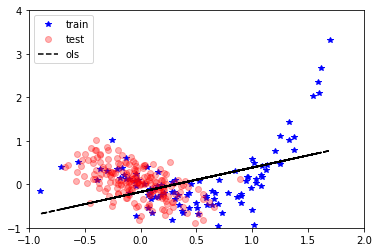

In [42]:
plt.plot(train_x[:,1], train_y, 'b*', label = 'train')
plt.plot(test_x, test_y, 'ro', label = 'test', alpha = 0.3)
#plt.plot(train_x[:,1], res.fittedvalues, 'y-',label = 'wls')
plt.plot(train_x[:,1], res_ols.fittedvalues,'k--',label = 'ols')
plt.xlim(-1, 2)
plt.ylim(-1, 4)
plt.legend(loc = 'best')
plt.savefig('res_ols.pdf')

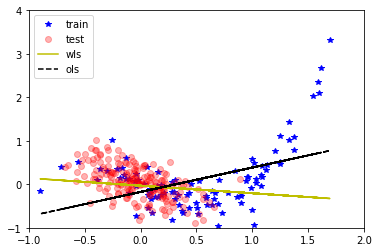

In [43]:
plt.plot(train_x[:,1], train_y, 'b*', label = 'train')
plt.plot(test_x, test_y, 'ro', label = 'test', alpha = 0.3)
plt.plot(train_x[:,1], res.fittedvalues, 'y-',label = 'wls')
plt.plot(train_x[:,1], res_ols.fittedvalues,'k--',label = 'ols')
plt.xlim(-1, 2)
plt.ylim(-1, 4)

plt.legend(loc = 'best')
plt.savefig('res_wls.pdf')

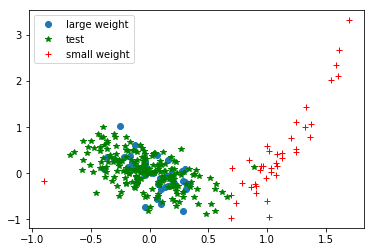

In [48]:
plt.plot(train_x[np.argsort(weight)[-40:],1],train_y[np.argsort(weight)[-40:]], 'o', label = 'large weight')
plt.plot(test_x, test_y,'*g', label = 'test')
plt.plot(train_x[np.argsort(weight)[:40],1],train_y[np.argsort(weight)[:40]], 'r+', label = 'small weight')
plt.legend()

## ３次曲線でのフィッティング
正直3次元だとあんまり変わらなす

In [50]:
# numpy配列の結合の際にはbroadcastingが必要っぽ
train_x_3dim = np.concatenate((train_x, (np.zeros(100)[:, np.newaxis]), (train_x[:, 1]**3)[:, np.newaxis]), axis=1)

In [51]:
wls_model_3dim = sm.WLS(list(train_y), train_x_3dim, weights = weight)
ols_model_3dim = sm.OLS(list(train_y), train_x_3dim)
res_3dim = wls_model_3dim.fit()
res_ols_3dim = ols_model_3dim.fit()
res_3dim.params

array([ 0.0017253 , -1.06044786,  0.        ,  1.05155884])

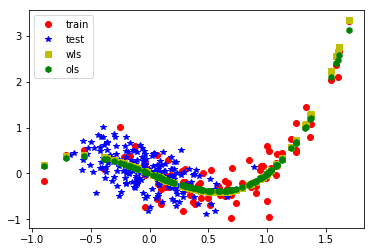

In [52]:
plt.plot(train_x_3dim[:,1], train_y, 'ro', label = 'train')
plt.plot(test_x, test_y, 'b*', label = 'test')
plt.plot(train_x_3dim[:,1], res_3dim.fittedvalues, 'ys',label = 'wls')
plt.plot(train_x_3dim[:,1], res_ols_3dim.fittedvalues,'gh',label = 'ols')
plt.legend(loc = 'best')
plt.savefig('res_wls_3dim.pdf')

In [87]:
res_3dim.params

array([ 0.0014203 , -1.06519122,  0.        ,  1.05628957])

In [53]:
res_ols_3dim.params

array([-0.00360347, -0.98429424,  0.        ,  0.98365565])